## https://seaborn.pydata.org/

## https://seaborn.pydata.org/api

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
iris=sns.load_dataset('iris')
mpg=sns.load_dataset('mpg')
tips = sns.load_dataset('tips')
titanic=sns.load_dataset('titanic')

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

In [8]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
df = pd.DataFrame(list(zip(labels, men_means, women_means)), columns =["labels", "men_means", "women_means"])
df.head()

,labels,men_means,women_means
0,G1,20,25
1,G2,34,32
2,G3,30,34
3,G4,35,20
4,G5,27,25


<BarContainer object of 5 artists>

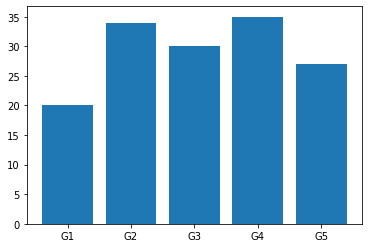

In [9]:
plt.bar(df['labels'], df['men_means'])

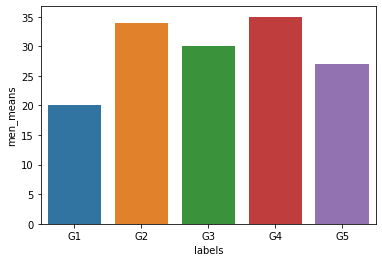

In [10]:
sns.barplot(df['labels'], df['men_means'])

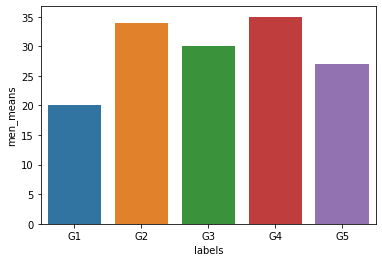

In [11]:
sns.barplot(x='labels',y ='men_means',data=df) # method 2 parantez icinde df i kaldirip data=df ile kaldirabiliriz. 

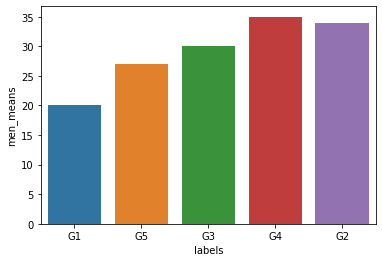

In [12]:
#### order onemli yapabiliyoruz burda siralama.

sns.barplot('labels','men_means',order = ['G1', 'G5', 'G3', 'G4', 'G2'], data=df) 


# data=df tanimlarsak x ve y = gerek kalmiyor.

In [13]:
df.sort_values("men_means").labels

0    G1
4    G5
2    G3
1    G2
3    G4
Name: labels, dtype: object

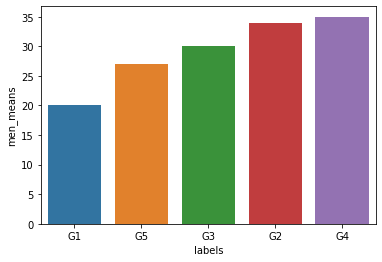

In [14]:
sns.barplot(x='labels',y='men_means',order = df.sort_values("men_means").labels, data=df) 

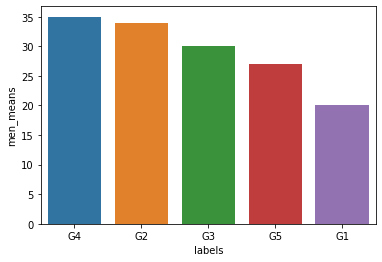

In [15]:
sns.barplot(x='labels',y='men_means',order = df.sort_values("men_means", ascending = False).labels, data=df)

In [16]:
y=[59219,
 55466,
 47544,
 36443,
 35917,
 31991,
 27097,
 23030,
 20524,
 18523,
 18017,
 7920,
 7331,
 7201,
 5833]

x= ['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shel/PS',
 'C#',
 'PHP',
 'C++',
 'TypeScript',
 'C',
 'Other(s):',
 'Ruby',
 'Go',
 'Assembly']

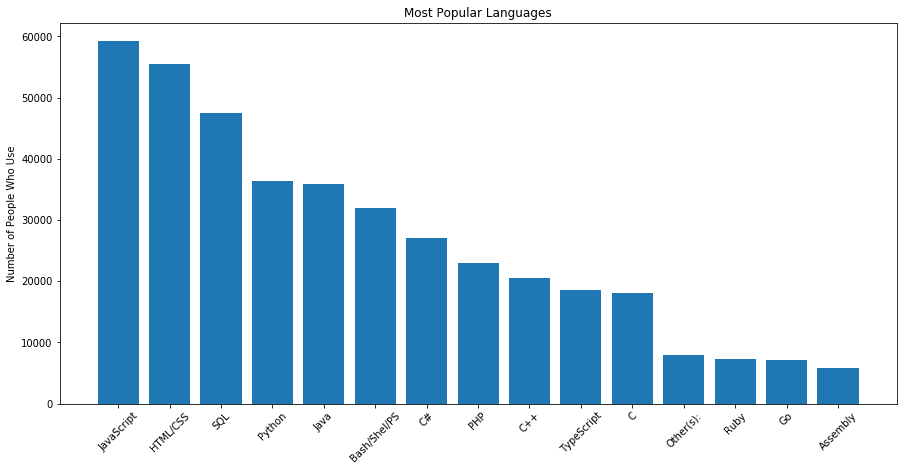

In [17]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x, y)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);    # x var karsiliginda y degerini cizer, frekansini ciziyor.

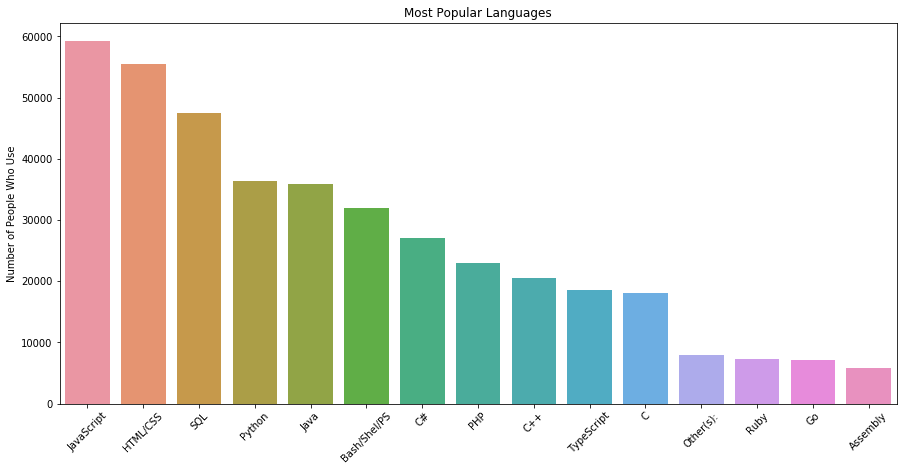

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x, y, ax = ax) # seaborn da ax lar basta degil paranntez icinde yaziliyor.
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

### seaborn un istatistiksel yonu var bunu incelememiz gerekiuor simdi.

# Barplot(actual)

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


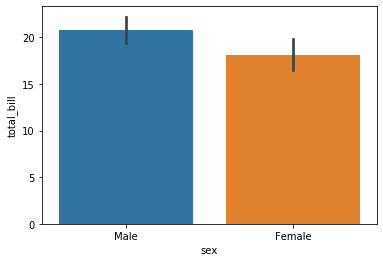

In [20]:
### with SEABORN ile cizimi 

sns.barplot(x= "sex", y="total_bill", data= tips)
# yukaridan farki burada degerlerin karsiligi yok otamatik "groupby" yapiyor mean degerlerini hesapliyor.
#Cizgi defoult "confidence interval" "ci" dir bazen de "standard sapma" olur.

In [21]:
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [ ]:
#plt.bar(tips["sex"], tips["total_bill"]);  #aradığımız grafik değil

In [ ]:
# with pandas
tips.groupby("sex")["total_bill"].mean().plot.bar() # sonuna plot.bar getir hemen ciziyor.

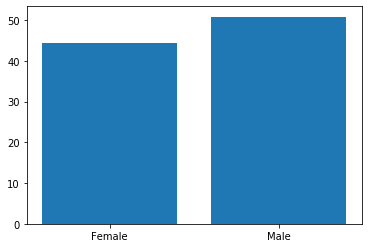

In [22]:
plt.bar(tips["sex"], tips["total_bill"]);

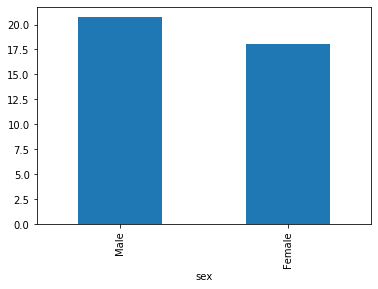

In [34]:
#with PANDAS .plot.bar() yaziyorsun ciziyor hemen.

tips.groupby("sex")["total_bill"].mean().plot.bar() ##### pandas taki cizimi

In [ ]:
### with MATPLOTLIB ile cizimi
#cizim zor MATPLOTLIB ile ayrica x ve y yi tanimlamak gerek, INDEX ve VALUES ayirmak gerekli cizmek icin.

In [24]:
aa =tips.groupby("sex")["total_bill"].mean() 
#bu syntax in value larını ve indexini alıcaz aa.index aa.value

In [25]:
aa

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [26]:
aa.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, name='sex', dtype='category')

In [27]:
aa.values

array([20.74407643, 18.05689655])

<BarContainer object of 2 artists>

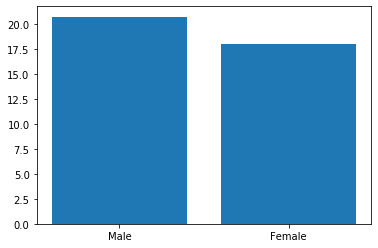

In [28]:
plt.bar(aa.index, aa.values) ### MATHPLOTLIB ile ancak boyle cizebiliyoruz. Ayri ayri hesaplayip.

<BarContainer object of 2 artists>

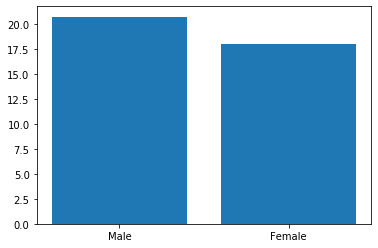

In [29]:
plt.bar(tips.groupby("sex").mean().index, tips.groupby("sex")["total_bill"].mean()) # matplotlib 

<BarContainer object of 2 artists>

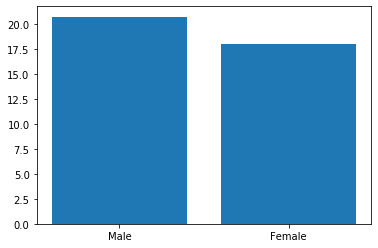

In [38]:
y=tips.groupby("sex").total_bill.mean()
x=tips.groupby("sex").total_bill.mean().index
fig, ax = plt.subplots()
ax.bar(x, y)

In [ ]:
# ci parameter

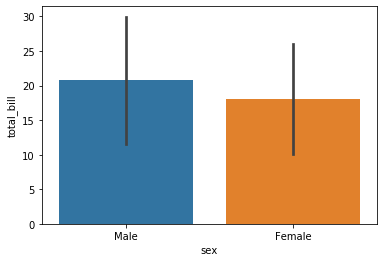

In [39]:
sns.barplot(x='sex',y='total_bill', ci ="sd", data=tips) 

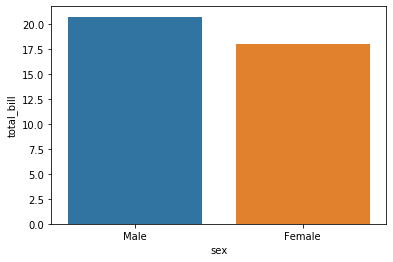

In [30]:
sns.barplot(x='sex',y='total_bill', ci =None, data=tips) 

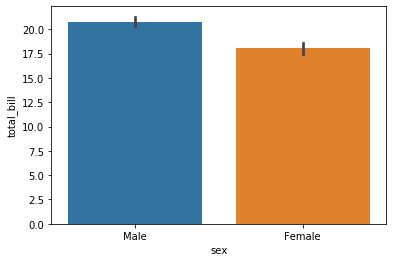

In [47]:
sns.barplot(x='sex', y='total_bill',data=tips, ci = 50) ## ci "None" ile cizgiden kurtuluyoruz

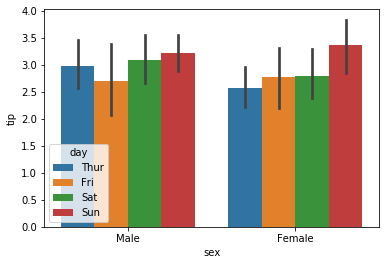

In [52]:
sns.barplot(x= "sex", y = "tip", hue = "day", data=tips)

In [ ]:
# hue parameter

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


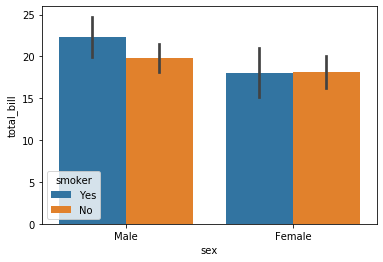

In [32]:
sns.barplot(x="sex", y="total_bill", hue="smoker", data=tips);

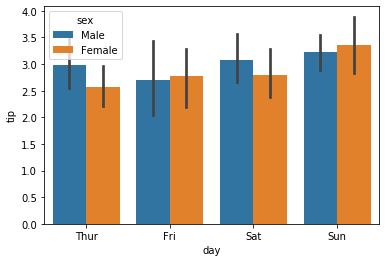

In [112]:
sns.barplot(x= "day", y = "tip", hue = "sex", data=tips)

In [ ]:
# compare 

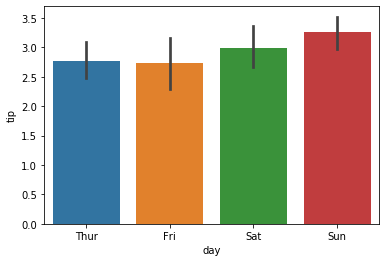

In [53]:
sns.barplot(x= "day", y = "tip", data=tips)

In [33]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [34]:
# compare the avg horsepower for each cylinder type

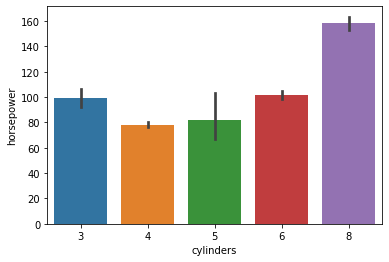

In [36]:
sns.barplot(x="cylinders", y="horsepower", data=mpg)

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


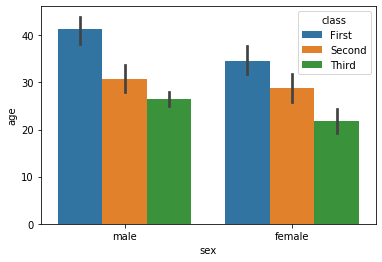

In [38]:
sns.barplot(x= "sex", y = "age", hue = "class", data=titanic);

In [10]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

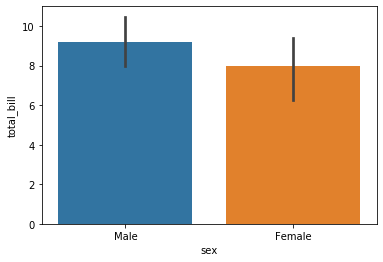

In [39]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std); ### estimator ile function degisebilir.

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

In [40]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


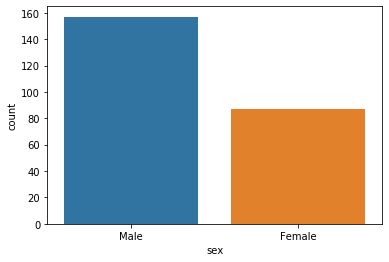

In [41]:
sns.countplot(x='sex',data=tips)

In [42]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

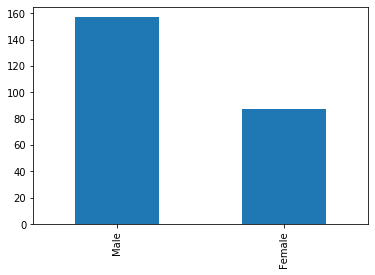

In [43]:
#power of pandas
tips.sex.value_counts().plot(kind="bar")

In [44]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


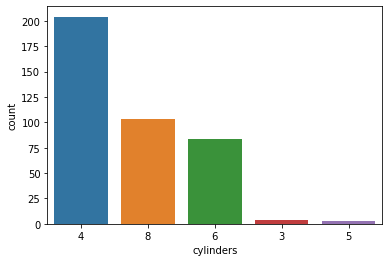

In [45]:
sns.countplot(x='cylinders',order = [4,8,6,3,5], data=mpg)

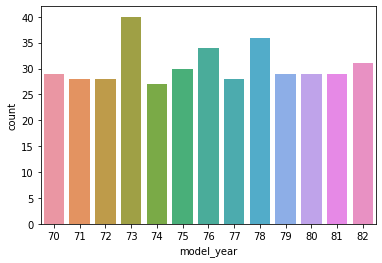

In [46]:
sns.countplot(x="model_year", data=mpg)

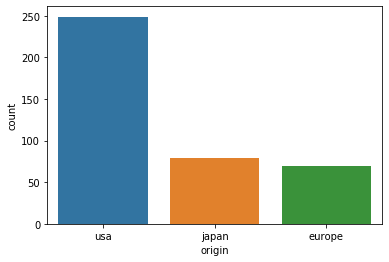

In [47]:
sns.countplot(x="origin", data=mpg)

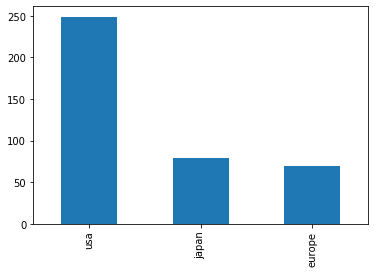

In [48]:
#PANDAS ile cizimi

mpg.origin.value_counts().plot(kind ="bar")

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

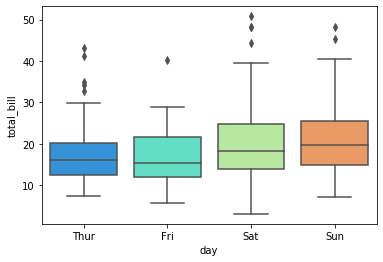

In [49]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


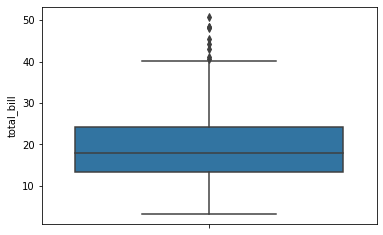

In [54]:
sns.boxplot(tips.total_bill, orient = "v") ## vertical line icin orient = "v"

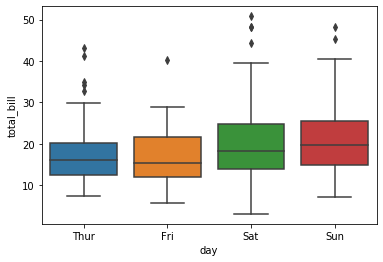

In [74]:
sns.boxplot( x ="day", y = "total_bill", data= tips)

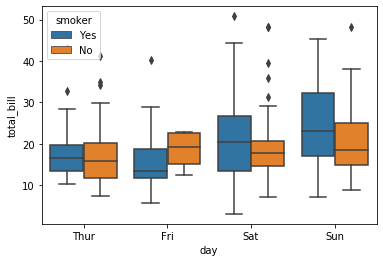

In [77]:
sns.boxplot( x ="day", y = "total_bill", hue="smoker", data= tips)

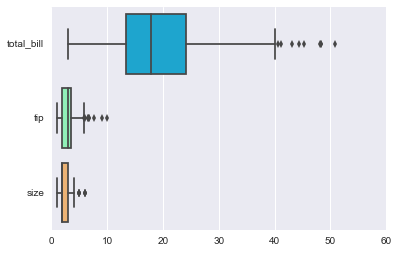

In [25]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h') ## horizantal line icin orient = "h"

In [55]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


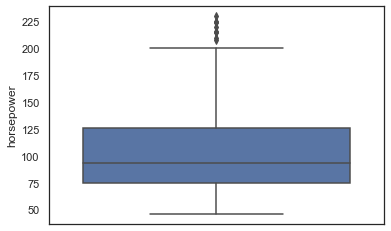

In [57]:
sns.set(style='white', color_codes=True)
a = sns.load_dataset('mpg')
sns.boxplot(x='horsepower', data=mpg, orient='v');

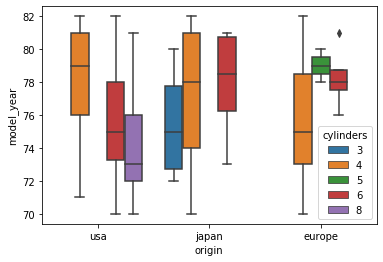

In [81]:
sns.boxplot(x="origin", y="model_year", hue="cylinders", data=mpg)

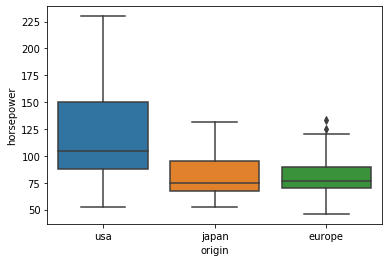

In [82]:
sns.boxplot(x= "origin", y = "horsepower", data = mpg) ### box ta meadian i goruyoruz.

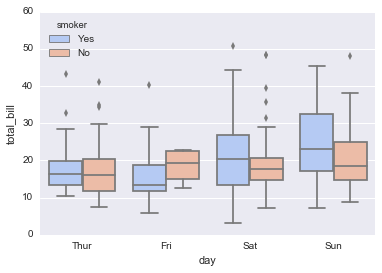

In [26]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

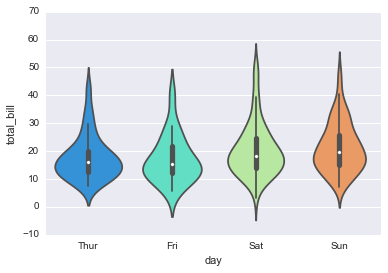

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')#box ta meadian i beyaz nokta goruyoruz, 
#ama yigilmanin nerde oldugunu goruyoruz. 

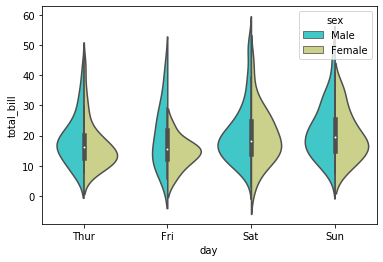

In [85]:
sns.violinplot(x="day", y="total_bill", hue = "sex", split = True, data=tips) # split ile bayanlari ayirdik

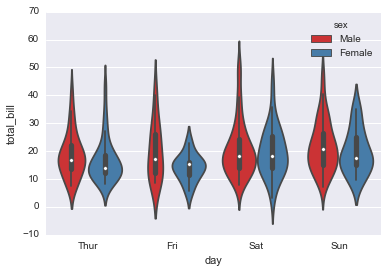

In [37]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

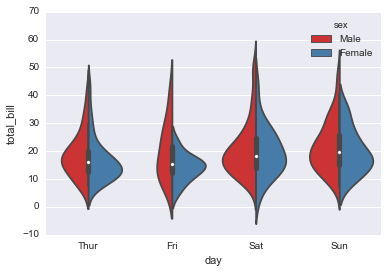

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

In [ ]:
### Iki tarafida numeric olursa scatter olur, bir tarafi categoric bir eksen numeric olursa stripplot olur.

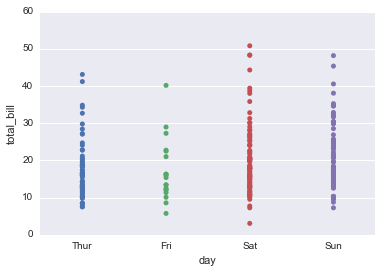

In [38]:
sns.stripplot(x="day", y="total_bill", data=tips)  ### stripplot

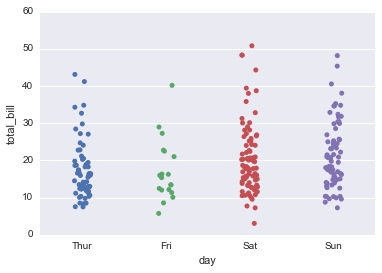

In [39]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

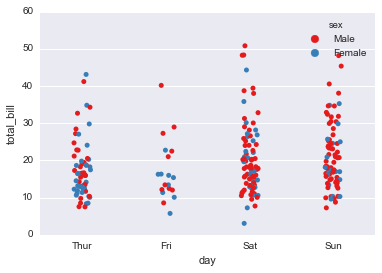

In [42]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

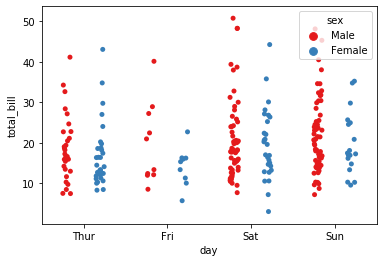

In [86]:
sns.stripplot(x="day", y="total_bill", data=tips,dodge = True,hue='sex',palette='Set1')

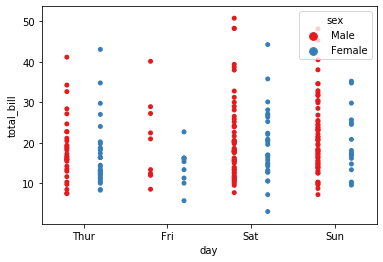

In [88]:
sns.stripplot(x="day", y="total_bill", data=tips, dodge= False, jitter=False, hue='sex',palette='Set1',split=True)

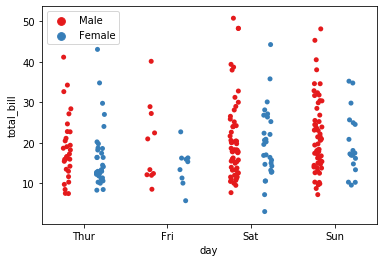

In [97]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)
plt.legend(loc = 2)  ### Etiket legend yeri degistirebiliyoruz. Sola dogru yer degistiriyor, 2,3,4 gibi

In [ ]:
#### SWARMPLOT= STRIM+VIOLIN
#### Data seti cok yogun degilse swarplot cok guzel bilgi verir, strim ve violin plot un karisimidir. 

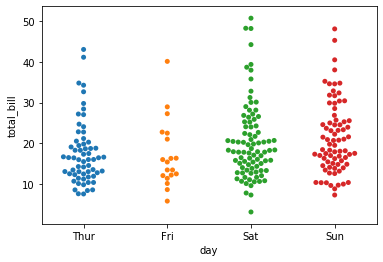

In [100]:
sns.swarmplot(x="day", y="total_bill", data=tips);  # don't try in large dataset.

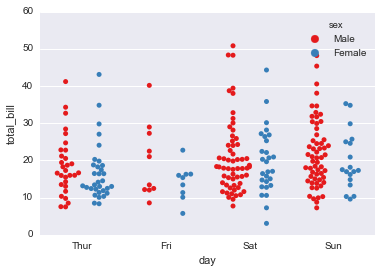

In [47]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

In [ ]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

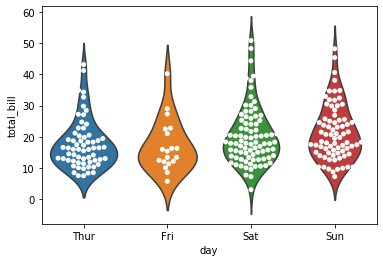

In [104]:
ax = sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
ax = sns.swarmplot(x='day', y='total_bill', data=tips, color='w')

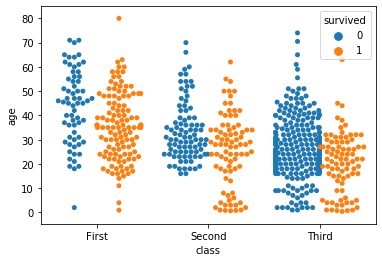

In [102]:
sns.swarmplot(x="class", y="age",hue='survived',data=titanic, split=True)

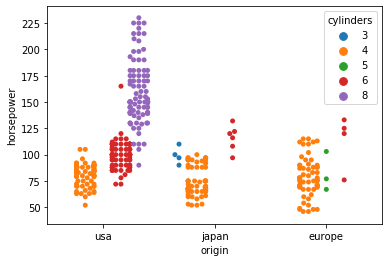

In [106]:
sns.swarmplot(x="origin", y="horsepower", data=mpg, hue='cylinders', split= True)

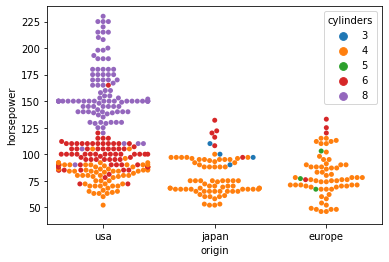

In [107]:
sns.swarmplot(x="origin", y="horsepower", data=mpg, hue='cylinders')

## Catplot

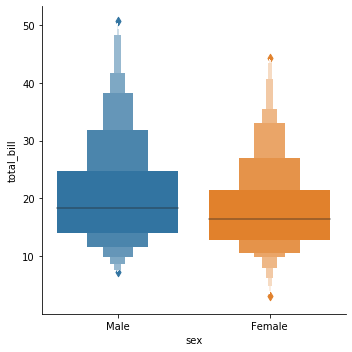

In [109]:
sns.catplot(x="sex", y="total_bill", kind='boxen', data=tips)


## pointplot

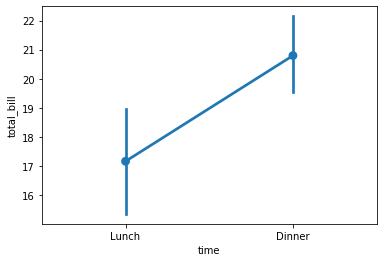

In [111]:
sns.pointplot(x="time", y="total_bill", data=tips)


### Combining Categorical Plots

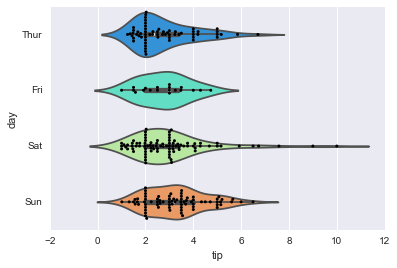

In [61]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

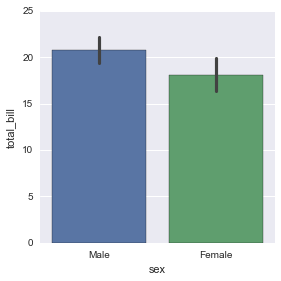

In [15]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

# Great Job!